#BÚSQUEDA A*


A la forma más ampliamente conocida de la búsqueda primero el mejor se le llama búsqueda A* (pronunciada «búsqueda A-estrella»).

Evalúa los nodos combinando g(n), el coste para alcanzar el nodo, y h(n), el coste de ir al nodo objetivo está dado por la función de evaluación:

$f (n) = g(n) + h(n)$

Ya que la g(n) nos da el coste del camino desde el nodo inicio al nodo n, y la heurística h(n) el coste estimado del camino más barato desde n al objetivo, tenemos:

$f(n)$ coste más barato estimado de la solución a través de n.



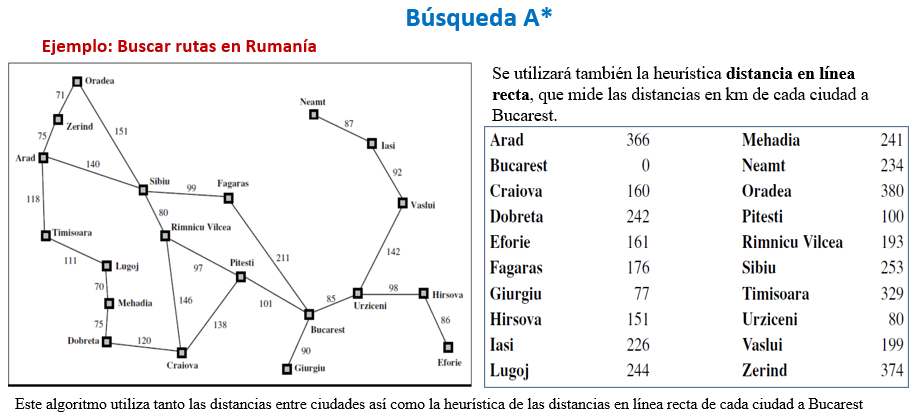

PARA LA IMPLEMENTACION DE EL ALGORITMO A* SE UTILIZO EL MAPA DE LA CIUDAD DEL CUSCO

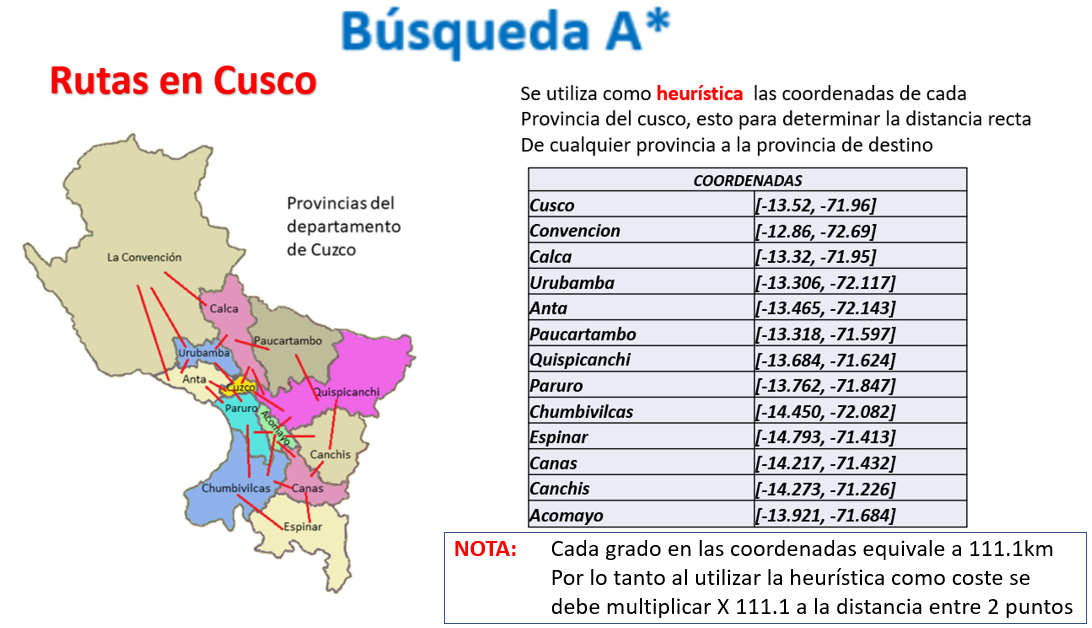

¡¡¡ IMPLEMENTAR LAS CLASES Y LA APLICACIÓN !!!

In [ ]:
import random

In [ ]:
#Clase Acción
class Accion:
  def __init__(self, nombre):
    self.nombre = nombre

  def __str__(self):
    return self.nombre

In [ ]:
#Clase Estado
#Colocaremos como atributo adicional el coste que representa a la heurística
class Estado:
  def __init__(self, nombre, acciones, coste):
    self.nombre = nombre
    self.acciones = acciones
    self.coste = coste

  def __str__(self):
    return self.nombre

In [ ]:
#Clase Problema.
class Problema:
  def __init__(self, estado_inicial, estados_objetivos, acciones, costes=None):
    self.estado_inicial = estado_inicial
    self.estados_objetivos = estados_objetivos
    self.acciones = acciones
    self.costes = costes
    self.infinito = 99999
    # -- Si no se tiene costos, se inicializa todos los costos con 1
    if not self.costes:
      self.costes = {}
      for estado in self.acciones.keys():
        self.costes[estado] = {}
        for accion in self.acciones[estado].keys():
          self.costes[estado][accion] = 1

  def __str__(self):
    msg = "Estado Inicial: {0} -> Objetivos: {1}"
    return msg.format(self.estado_inicial.nombre,self.estados_objetivos)

  # -- Determina si se alcanzó el objetivo
  def es_objetivo(self, estado):
    return estado in self.estados_objetivos

  # -- Determina el estado al que se llega del estado actual en base a la acción
  def resultado(self, estado, accion):
    if estado.nombre not in self.acciones.keys():
      return None
    # -- Recuperar diccionario de posibles acciones que se pueden realizar del estado actual
    acciones_estado = self.acciones[estado.nombre]
    if accion.nombre not in acciones_estado.keys():
      return None
    # -- Recupera y devuelve el nuevo estado alcanzado después de ejecutar la acción
    return acciones_estado[accion.nombre]

  # -- Determina el costo de una acción de un estado
  def coste_accion(self, estado, accion):
    if estado.nombre not in self.costes.keys():
      return self.infinito
    costes_estado = self.costes[estado.nombre]
    if accion.nombre not in costes_estado.keys():
      return self.infinito
    return costes_estado[accion.nombre]

  # -- Determina el costo del camino desde la raiz a un nodo dado
  def coste_camino(self, nodo):
    total = 0
    while nodo.padre:
      total += self.coste_accion(nodo.padre.estado, nodo.accion)
      nodo = nodo.padre
    return total

In [ ]:
#Clase Nodo
class Nodo:
  def __init__(self, estado, accion=None, acciones=None, padre=None):
    self.estado = estado # -- Estado al que corresponde el nodo
    self.accion = accion # -- Acción mediante la cuál se llegó a este nodo
    self.acciones = acciones # -- Acciones posibles a realizar a partir de este nodo para llegar a los hijos
    self.padre = padre
    self.hijos = [] # -- Lista de nodos hijo (objetos) del nodo actual
    self.coste = 0
    self.TotalRecorrido=0

  def __str__(self):
    return self.estado.nombre

  # Método para expandir el nodo a los nodos hijo
  # -- Devuelve una lista de nodos hijo del nodo actual
  def expandir(self, problema):
    # -- Inicializar lista de nodos hijo
    self.hijos = []
    # -- Validar si el estado actual está o no en el contexto del problema
    if not self.acciones:
      if self.estado.nombre not in problema.acciones.keys():
        return self.hijos
      self.acciones = problema.acciones[self.estado.nombre]
    # -- Recuperar los nodos hijo en función a las acciones que se pueden realizar
    for accion in self.acciones.keys():
      accion_hijo = Accion(accion)
      nuevo_estado = problema.resultado(self.estado, accion_hijo)
      acciones_nuevo = {}
      if nuevo_estado.nombre in problema.acciones.keys():
        acciones_nuevo = problema.acciones[nuevo_estado.nombre]
      hijo = Nodo(nuevo_estado, accion_hijo, acciones_nuevo, self)
      # -- Determinar el costo del hijo
      coste = self.padre.coste if self.padre else 0
      coste += problema.coste_accion(self.estado, accion_hijo)
      hijo.coste = coste
      self.hijos.append(hijo)

    # -- Devuelve la lista de nodos hijo
    return self.hijos

  # Método para seleccionar el hijo con el costo óptimo
  def hijo_mejor(self, problema):
    if not self.hijos:
      return None
    mejor = self.hijos[0]
    for hijo in self.hijos:
      if (hijo.coste < mejor.coste):
        mejor = hijo
    return mejor

In [ ]:
#Clase ViajesCiudades
class ViajesCiudades:

  def __init__(self):
    # -- Nombre de la clase
    self.nombre = 'BUSQUEDA A*'

    # -- Definición de acciones
    accN = Accion ('N')
    accS = Accion ('S')
    accE = Accion ('E')
    accO = Accion ('O')
    accNO = Accion ('NO')
    accSO = Accion ('SO')
    accNE = Accion ('NE')
    accSE = Accion ('SE')

   # -- Definción de estados
    arad = Estado('Arad', [accNE, accS, accSE], [366])
    zerind = Estado('Zerind', [accNE, accSO], [374])
    oradea = Estado(' Oradea', [accSO, accS], [380])
    sibiu = Estado('Sibiu', [accNO, accN, accE, accSE], [253])
    fagaras = Estado('Fagaras', [accO, accS], [176])
    bucarest = Estado('Bucarest', [accN, accNO, accSO, accNE], [0])
    giurgiu = Estado('giurgiu', [accNE], [77])
    pitesti = Estado('Pitesti',[accNO, accSE, accSO] , [100])
    rimnicu_vilcea = Estado('rimnicu_vilcea', [accNO,accSE,accS], [193])
    craiova = Estado('craiova', [accN, accNE, accNO], [160])
    dobreta = Estado('Dobreta', [accE, accN], [ 242])
    mehadia = Estado('Mehadia', [accN,accS], [241])
    lugoj = Estado('Lugoj', [ accNO,accS], [244])
    timisoara = Estado('Timisoara', [ accN,accSE], [329])
    urziceni = Estado('Urzineci', [ accSO, accE,accNE], [80])
    vaslui = Estado('Vaslui', [ accNO,accSO], [199])
    lasi = Estado('Lasi', [ accNO, accSE], [226])
    neamt = Estado('Neamt', [ accSE], [234])
    hirsova = Estado('Hisova', [ accO, accSE], [151])
    eforie = Estado('Eforie', [ accNO], [161])

       # -- Definición de viajes
    viajes ={
        'Arad':{'NE':zerind,
                'S':timisoara,
                 'SE':sibiu},

        'Zerid':{'NE':oradea,
                  'SO':arad},
        'Oradea':{'SO':zerind,
                 'S':sibiu},
        'Sibiu':{'NO':arad,
                    'N':oradea,
                    'E':fagaras,
                    'SE':rimnicu_vilcea},
        'Fagaras':{'O':sibiu,
                'S':bucarest},
        'Bucarest':{'N':fagaras,
                    'NO':pitesti,
                    'SO':giurgiu,
                    'NE':urziceni},
        'Giurgiu':{ 'NE':bucarest},

        'Pitesti':{'NO':rimnicu_vilcea,
                        'SE':bucarest,
                        'SO':craiova},

        'rimnicu_vilcea':{'NO':sibiu,
                  'SE':pitesti,
                  'S':craiova},

        'Craiova':{'N':rimnicu_vilcea,
                        'NE':pitesti,
                        'NO':dobreta},
        'Dobreta':{'E':craiova,
                   'N':mehadia},
        'Mehadia':{'N':lugoj,
                 'S':dobreta},

        'Lugoj':{'NO':timisoara,
                   'S':mehadia},
        'Timisoara':{'N':arad,
                   'SE':lugoj},
         'Urziceni':{'SO':bucarest,
                   'E':hirsova,
                   'NE':vaslui},
        'Vaslui':{'NO':lasi,
                   'SO':urziceni},
        'Lasi':{'NO':neamt,
                   'SE':vaslui},
        'Neamt':{'SE':lasi},

        'Hirsova':{'O':urziceni,
                   'SE':eforie},
        'Eforie':{'NO':hirsova}
    }

# -- Definición de costos
    costes ={
        'Arad':{'NE':75,
                 'S':118,
                 'SE':140},

        'Zerid':{'NE':71,
                  'SO':75},

        'Oradea':{'SO':71,
                 'S':151},

        'Sibiu':{'NO':140,
                    'N':151,
                    'E':99,
                    'SE':80},

        'Fagaras':{'O':99,
                'S':211},

        'Bucarest':{'N':211,
                    'NO':101,
                    'SO':90,
                    'NE':90},


        'Giurgiu':{ 'NE':90},
        'Pitesti':{'NO':97,
                        'SE':101,
                        'SO':138},

        'rimnicu_vilcea':{'NO':80,
                  'SE':97,
                  'S':146},

        'Craiova':{'N':146,
                        'NE':138,
                        'NO':120},

        'Dobreta':{'E':120,
                   'N':75},

        'Mehadia':{'N':70,
                 'S':75},

        'Lugoj':{'NO':111,
                   'S':70},

        'Timisoara':{'N':118,
                   'SE':111},

         'Urziceni':{'SO':85,
                   'E':98,
                    'NE':142},

        'Vaslui':{'NO':92,
                   'SO':142},

        'Lasi':{'NO':87,
                   'SE':92},

        'Neamt':{'SE':87},

        'Hirsova':{'O':98,
                   'SE':86},

        'Eforie':{'NO':86}


    }
    # -- Definir el atributo lista de estados en el contexto del problema
    self.estados = [arad, zerind, oradea, sibiu, fagaras, bucarest, giurgiu,
                    pitesti, rimnicu_vilcea, craiova, dobreta, mehadia, lugoj,
                    timisoara, urziceni, vaslui, lasi, neamt, hirsova, eforie]
    # -- Definir el atributo de los posibles viajes de una ciudad a otras
    self.viajes = viajes
    # -- Definir el atributo de los costos (en km) de los posibles viajes
    self.costes = costes

  def __str__(self):
    return self.nombre

  def crea_nodo_raiz(self, problema):
    estado_raiz = problema.estado_inicial
    acciones_raiz = {}
    if estado_raiz.nombre in problema.acciones.keys():
      acciones_raiz = problema.acciones[estado_raiz.nombre]
    raiz = Nodo(estado_raiz, None, acciones_raiz, None)
    return raiz

  def crea_nodo_hijo (self, problema, padre, accion):
    nuevo_estado = problema.resultado (padre.estado, accion)
    acciones_nuevo = {}
    if nuevo_estado.nombre in problema.acciones.keys():
      acciones_nuevo = problema.acciones[nuevo_estado.nombre]
    hijo = Nodo(nuevo_estado, accion, acciones_nuevo, padre)
    padre.hijos.append(hijo)
    return hijo

  def mostrar_nodo_padre(self, nodo):
    if nodo.padre:
      self.mostrar_nodo_padre(nodo.padre)
      print()
      print('--------------------------------')
      print('Se partió de la provincia de ', nodo.padre.estado.nombre)
      print('Se llegó a la provincia de ', nodo.estado.nombre)
      print('Con una distancia recorrida Total de: ', nodo.TotalRecorrido,'km')
      print('Con un coste(ruta + hcoste): ', nodo.TotalRecorrido,' + ',nodo.coste-nodo.TotalRecorrido,' = ',nodo.coste)

  def muestra_solucion(self, objetivo=None):
    if not objetivo:
      print('No hay solucion')
      return
    self.mostrar_nodo_padre(objetivo)

  # Busqueda A*
  def busquedaAest(self, problema):
    # -- Crea el nodo raiz en función al estado inicial
    raiz = self.crea_nodo_raiz(problema)
    # -- Verifica si se alcanzó el objetivo
    if problema.es_objetivo(raiz.estado):
      return raiz
    # -- Poner la raíz a la cola (frontera)
    frontera = [raiz]
    explorados = set()
    while True:
      # -- Terminar si ya no hay más elementos en la cola
      if not frontera:
        return None
      # -- Recuperar el primer elemento de la cola
      nodo = frontera.pop(0)
      # -- Registrar el estado asociado al nodo como explorado
      if problema.es_objetivo(nodo.estado):
        return nodo
      explorados.add(nodo.estado)
      # -- Si nodo no tiene acciones, continuar en el siguiente nodo
      if not nodo.acciones:
        print ('no se encontraron acciones: ', nodo.estado.nombre)
        continue
      # -- Procesar cada acción y determinar nodos hijo
      for nombre_accion in nodo.acciones.keys():
        accion =  Accion(nombre_accion)
        hijo = self.crea_nodo_hijo(problema, nodo, accion)
        estados_frontera = [nodo.estado for nodo in frontera]
        if (hijo.estado not in explorados and hijo.estado not in estados_frontera):
          #SE LE AGREGA LA PRIMERA FUNCION DE COSTE
          hijo.TotalRecorrido=problema.coste_camino(hijo)
          hijo.coste=hijo.TotalRecorrido
          #SE LE AGREGA LA Hcoste
          hijo.coste+= hijo.estado.coste[0]
          confirmacion=0
          for x in range(len(frontera)):
            if hijo.coste < frontera[x].coste:
              confirmacion=1
              frontera.insert(x,hijo)
          if confirmacion==0:
            frontera.insert(len(frontera),hijo)


  # Determinar una ruta utilizando la estrategía de búsqueda de A*
  def DeterminarRuta(self):
    # -- Solicitar ciudad inicial y ciudad destino
    ciudad_inicial = input('Ingrese ciudad de partida: ')
    ciudad_destino = input('Ingrese ciudad de destino: ')
    # -- Generar estado_inicial y estados objetivo
    estado_inicial = [e for e in self.estados if e.nombre == ciudad_inicial][0]
    estados_objetivo = [e for e in self.estados if e.nombre == ciudad_destino]
    estados_coste = [self.costes[ciudad_inicial][e] for e in self.costes[ciudad_inicial]]
    # -- Instanciar la clase Problema
    problema = Problema(estado_inicial, estados_objetivo, self.viajes, self.costes)
    solucion = self.busquedaAest(problema)
    self.muestra_solucion(solucion)

In [ ]:
# -- Crear una instancia de la clase de viajes de ciudades
viaje_ciudades = ViajesCiudades()
# -- Determinar rutas
viaje_ciudades.DeterminarRuta()

Ingrese ciudad de partida: arad
Ingrese ciudad de destino: bucarest


IndexError: ignored